In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [28]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download("JNJ", start='2020-01-01', end='2023-12-31', progress=False)
dados = df_dados.reset_index() #Dropa a data do index e vira uma coluna no Dataframe
dados.head(2)

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099136,5777000
1,1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592880,5752400


In [26]:
# Vamos dividir os dados em treino (ate o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']
dados_treino.head(2)

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099136,5777000
1,1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592880,5752400


In [27]:
# Preparando os dados para o FBProphet (selecionando apenas 2 colunas e renomeando elas)
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino.head(2)

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999


In [22]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=True)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp18yvhq9s/y1qt0uew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18yvhq9s/4emchk9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92933', 'data', 'file=/tmp/tmp18yvhq9s/y1qt0uew.json', 'init=/tmp/tmp18yvhq9s/4emchk9h.json', 'output', 'file=/tmp/tmp18yvhq9s/prophet_modelh9175xud/prophet_model-20240401114305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
# Criar datas futuras para previsao ate o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

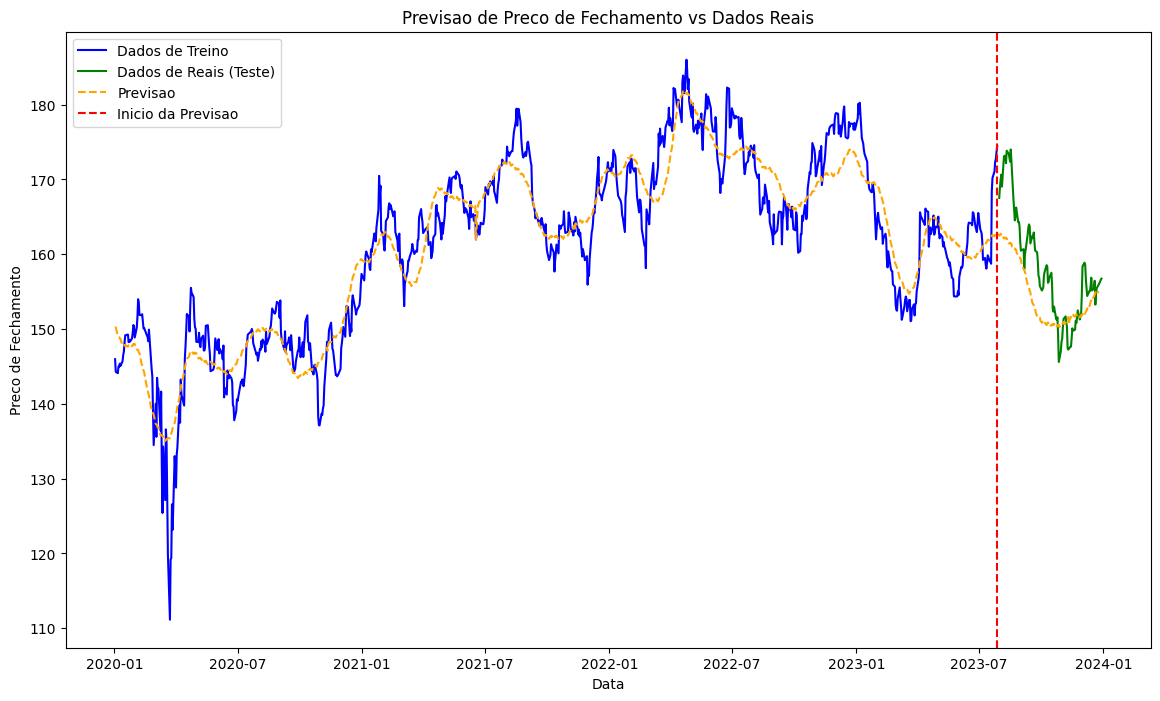

In [30]:
# Plotar os dados de treino, teste e previsoes
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados de Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label= 'Previsao', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Inicio da Previsao')
plt.xlabel('Data')
plt.ylabel('Preco de Fechamento')
plt.title('Previsao de Preco de Fechamento vs Dados Reais')
plt.legend()
plt.show()